In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import mne

edf_path = "/Volumes/Seizury/ds005873/sub-001/ses-01/mov/sub-001_ses-01_task-szMonitoring_run-03_mov.edf"
annotations_json_path = "/Volumes/Seizury/ds005873/sub-001/ses-01/mov/sub-001_ses-01_task-szMonitoring_run-03_mov.edf"

In [2]:
raw = mne.io.read_raw_edf(edf_path, preload=True)
print(raw.info)

Extracting EDF parameters from /Volumes/Seizury/ds005873/sub-001/ses-01/mov/sub-001_ses-01_task-szMonitoring_run-03_mov.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1624474  =      0.000 ... 64978.960 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG SD ACC X, EEG SD ACC Y, EEG SD ACC Z, EEG SD GYR A, EEG SD ...
 chs: 12 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 12.5 Hz
 meas_date: 2025-02-20 16:14:07 UTC
 nchan: 12
 projs: []
 sfreq: 25.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>


In [3]:
# 2) List channel names to find the movement channel
print("Channels:", raw.ch_names)

Channels: ['EEG SD ACC X', 'EEG SD ACC Y', 'EEG SD ACC Z', 'EEG SD GYR A', 'EEG SD GYR B', 'EEG SD GYR C', 'ECGEMG SD ACC X', 'ECGEMG SD ACC Y', 'ECGEMG SD ACC Z', 'ECGEMG SD GYR A', 'ECGEMG SD GYR B', 'ECGEMG SD GYR C']


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


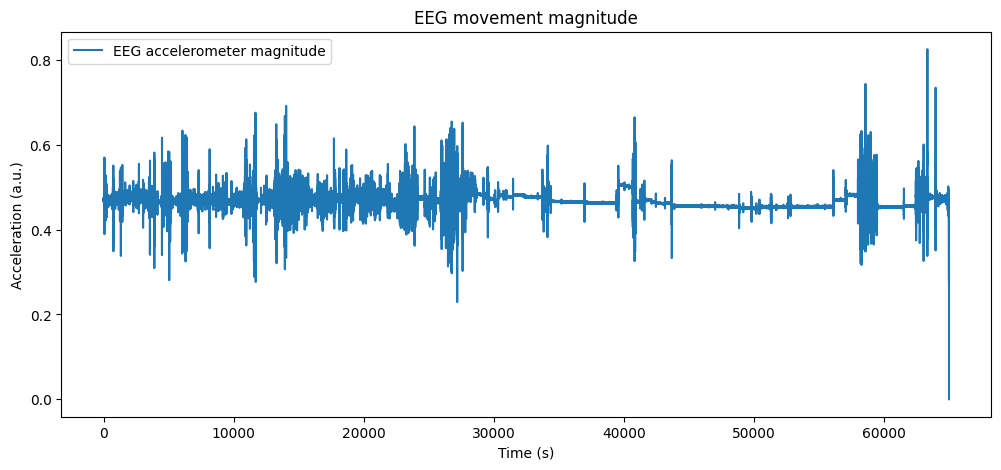

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# List of accelerometer and gyroscope channels for EEG
acc_eeg_chs = ['EEG SD ACC X', 'EEG SD ACC Y', 'EEG SD ACC Z']
gyr_eeg_chs = ['EEG SD GYR A', 'EEG SD GYR B', 'EEG SD GYR C']

# List for ECG/EMG
acc_body_chs = ['ECGEMG SD ACC X', 'ECGEMG SD ACC Y', 'ECGEMG SD ACC Z']
gyr_body_chs = ['ECGEMG SD GYR A', 'ECGEMG SD GYR B', 'ECGEMG SD GYR C']

# Example: Extract EEG accelerometer data
acc_eeg, times = raw.copy().pick_channels(acc_eeg_chs).get_data(return_times=True)

# Compute magnitude (overall movement intensity)
acc_magnitude = np.sqrt(np.sum(acc_eeg**2, axis=0))  # combine X,Y,Z

# Plot
plt.figure(figsize=(12,5))
plt.plot(times, acc_magnitude, label='EEG accelerometer magnitude')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (a.u.)")
plt.title("EEG movement magnitude")
plt.legend()
plt.show()


### Show the specific time windows

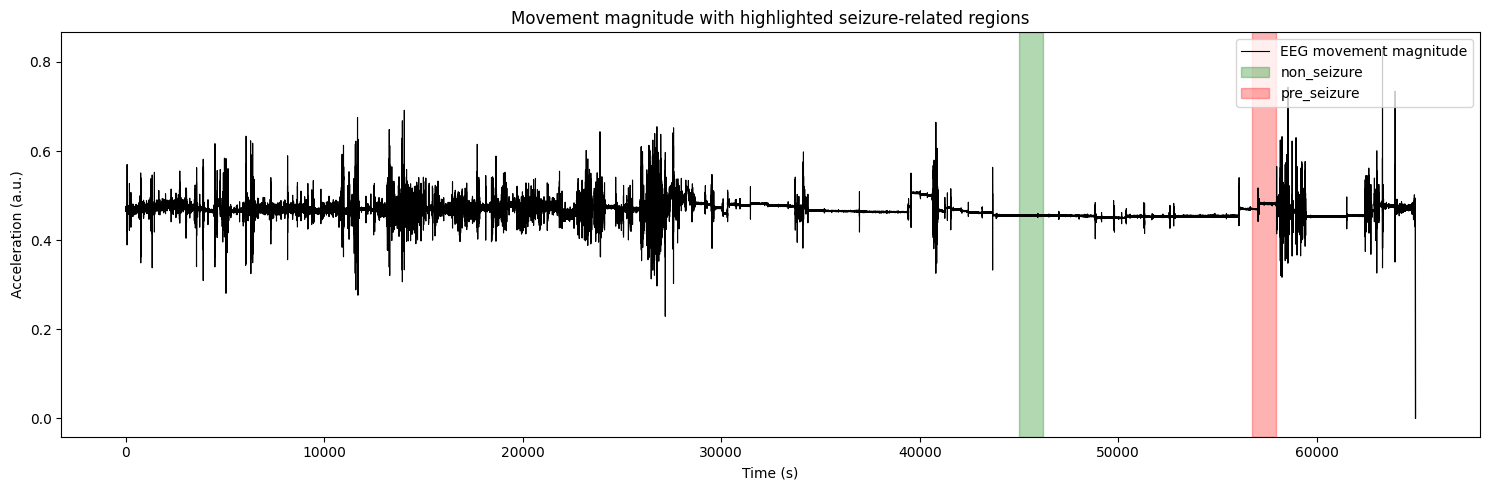

In [9]:
time_windows = {
    'non_seizure': {'start_s': 45000,  'end_s': 46200},
    'pre_seizure': {'start_s': 56760, 'end_s': 57960},
}

plt.figure(figsize=(15, 5))
plt.plot(times, acc_magnitude, color='black', linewidth=0.8, label='EEG movement magnitude')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (a.u.)")
plt.title("Movement magnitude with highlighted seizure-related regions")

for label, window in time_windows.items():
    start = window['start_s']
    end = window['end_s']
    color = 'green' if label == 'non_seizure' else 'red'
    plt.axvspan(start, end, color=color, alpha=0.3, label=label)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # remove duplicates
plt.legend(by_label.values(), by_label.keys(), loc='upper right')
plt.tight_layout()
plt.show()